In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model

import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from pandas.plotting import scatter_matrix

import seaborn as sns

path_fichier = "C:\\Users\\rclerc\\OneDrive - Jems\\Documents\\perso\\Demonstration\\TP_10\\"

Billets_df = pd.read_csv(path_fichier+"billets.csv",sep = ";",encoding = "utf-8")
Billets_production_df = pd.read_csv(path_fichier+"billets_production.csv",sep = ",",encoding = "utf-8")







In [2]:
#regression logistique
Billets_df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [3]:
Billets_df[Billets_df.isna().any(axis=1)]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


In [4]:
#Billets_df = Billets_df.dropna("margin_low")
#print(Billets_df)

Billets_df = Billets_df.dropna()
Billets_df[Billets_df.isna().any(axis=1)]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length


In [5]:
#valeurs caractéristiques et valeur cible
x = Billets_df[['diagonal', 'height_left', 'height_right','margin_low','margin_up','length']]
y = Billets_df['is_genuine']

In [6]:
#fractionner dataset ( random_state = seed )
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [7]:
#instanciation du modèle
modele_regLog_1 = linear_model.LogisticRegression(random_state = 0,solver = 'lbfgs', multi_class = 'auto')

modele_regLog_2 = linear_model.LogisticRegression(random_state = 0,solver = 'newton-cg', multi_class = 'auto')
modele_regLog_3 = linear_model.LogisticRegression(random_state = 0,solver = 'liblinear', multi_class = 'auto')
modele_regLog_4 = linear_model.LogisticRegression(random_state = 0,solver = 'sag', multi_class = 'auto')
modele_regLog_5 = linear_model.LogisticRegression(random_state = 0,solver = 'saga', multi_class = 'auto')


In [8]:
#training
modele_regLog_1.fit(x_train,y_train)
modele_regLog_2.fit(x_train,y_train)
modele_regLog_3.fit(x_train,y_train)
modele_regLog_4.fit(x_train,y_train)
modele_regLog_5.fit(x_train,y_train)

C:\Users\rclerc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\rclerc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(random_state=0, solver='saga')

In [9]:
#précision du modèle
precision = modele_regLog_1.score(x_test,y_test)
print(precision*100)

98.90710382513662


In [10]:
precision = modele_regLog_2.score(x_test,y_test)
print(precision*100)

98.90710382513662


In [11]:
precision = modele_regLog_3.score(x_test,y_test)
print(precision*100)

98.90710382513662


In [12]:
precision = modele_regLog_4.score(x_test,y_test)
print(precision*100)

97.54098360655738


In [13]:
precision = modele_regLog_5.score(x_test,y_test)
print(precision*100)

95.08196721311475


In [14]:
Billets_production_df

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [15]:
for id in Billets_production_df["id"]:

    #print(Billets_production_df[Billets_production_df["id"]==id][['diagonal', 'height_left', 'height_right','margin_low','margin_up','length']])
    print("Billet "+id)
    
    #prédiction
    prediction_billet = modele_regLog_1.predict(Billets_production_df[Billets_production_df["id"]==id][['diagonal', 'height_left', 'height_right','margin_low','margin_up','length']])
    print(prediction_billet)
    
    prediction_billet = modele_regLog_2.predict(Billets_production_df[Billets_production_df["id"]==id][['diagonal', 'height_left', 'height_right','margin_low','margin_up','length']])
    print(prediction_billet)

    prediction_billet = modele_regLog_3.predict(Billets_production_df[Billets_production_df["id"]==id][['diagonal', 'height_left', 'height_right','margin_low','margin_up','length']])
    print(prediction_billet)

    prediction_billet = modele_regLog_4.predict(Billets_production_df[Billets_production_df["id"]==id][['diagonal', 'height_left', 'height_right','margin_low','margin_up','length']])
    print(prediction_billet)

    prediction_billet = modele_regLog_5.predict(Billets_production_df[Billets_production_df["id"]==id][['diagonal', 'height_left', 'height_right','margin_low','margin_up','length']])
    print(prediction_billet)

    print("\n")

Billet A_1
[False]
[False]
[False]
[False]
[False]


Billet A_2
[False]
[False]
[False]
[False]
[False]


Billet A_3
[False]
[False]
[False]
[False]
[False]


Billet A_4
[ True]
[ True]
[ True]
[ True]
[ True]


Billet A_5
[ True]
[ True]
[ True]
[ True]
[ True]




In [ ]:
#K_means
#x = Billets_df[['diagonal', 'height_left', 'height_right','margin_low','margin_up','length']]
#y = Billets_df['is_genuine']

In [48]:
#Cluster K-means
model=KMeans(n_clusters=2)
model.fit(x)


KMeans(n_clusters=2)

array([[<AxesSubplot:xlabel='diagonal', ylabel='diagonal'>,
        <AxesSubplot:xlabel='height_left', ylabel='diagonal'>,
        <AxesSubplot:xlabel='height_right', ylabel='diagonal'>,
        <AxesSubplot:xlabel='margin_low', ylabel='diagonal'>,
        <AxesSubplot:xlabel='margin_up', ylabel='diagonal'>,
        <AxesSubplot:xlabel='length', ylabel='diagonal'>],
       [<AxesSubplot:xlabel='diagonal', ylabel='height_left'>,
        <AxesSubplot:xlabel='height_left', ylabel='height_left'>,
        <AxesSubplot:xlabel='height_right', ylabel='height_left'>,
        <AxesSubplot:xlabel='margin_low', ylabel='height_left'>,
        <AxesSubplot:xlabel='margin_up', ylabel='height_left'>,
        <AxesSubplot:xlabel='length', ylabel='height_left'>],
       [<AxesSubplot:xlabel='diagonal', ylabel='height_right'>,
        <AxesSubplot:xlabel='height_left', ylabel='height_right'>,
        <AxesSubplot:xlabel='height_right', ylabel='height_right'>,
        <AxesSubplot:xlabel='margin_low', yla

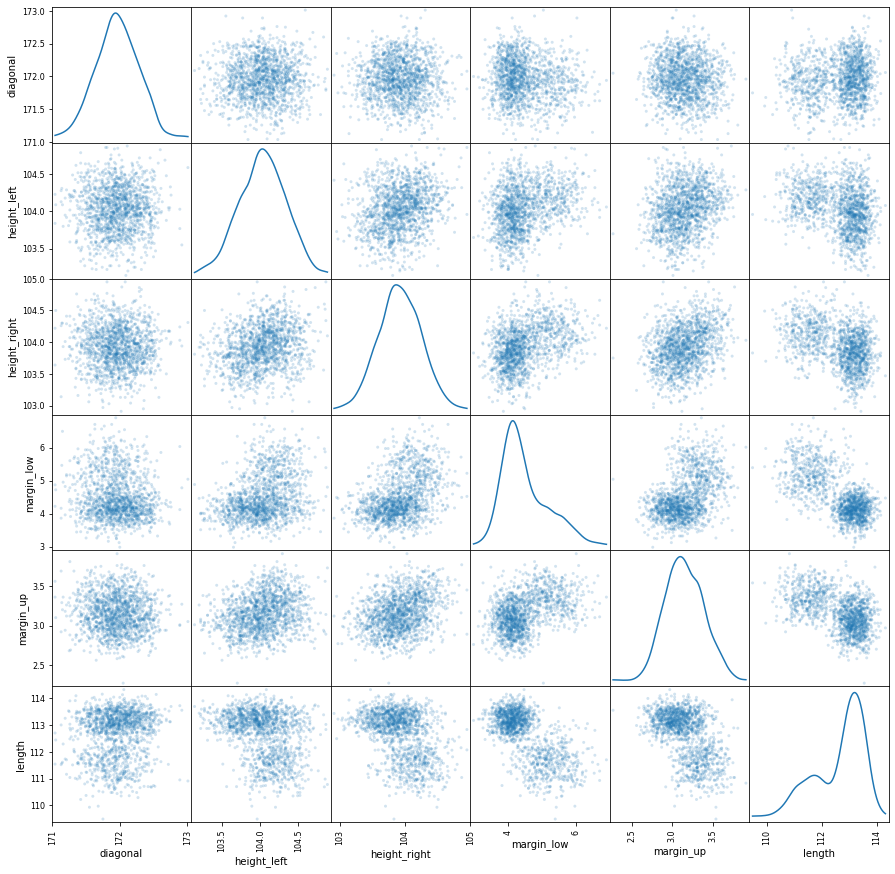

In [39]:
scatter_matrix(x,alpha=0.2,figsize=(15,15),diagonal="kde")

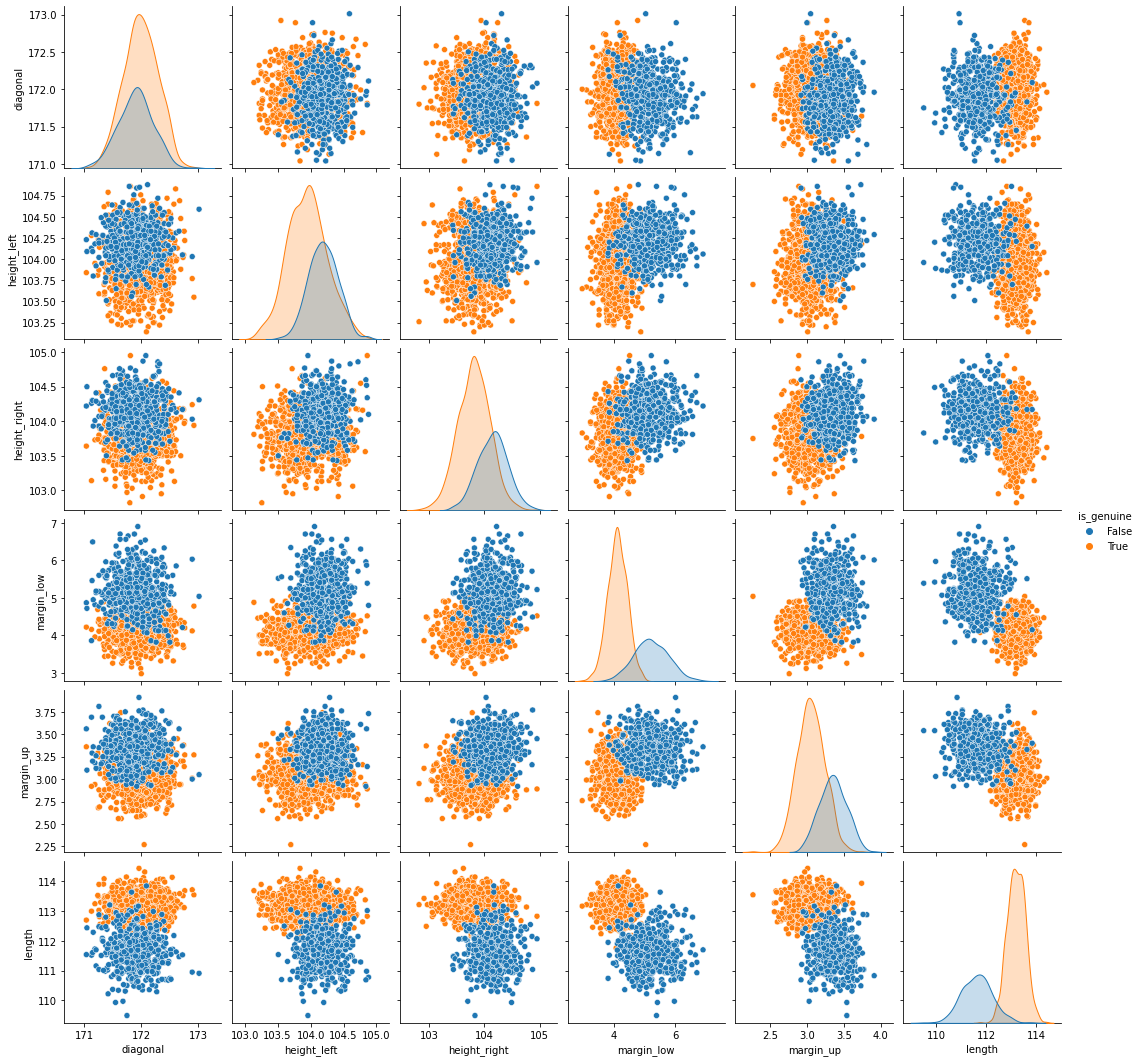

In [55]:
sns.pairplot(Billets_df,hue='is_genuine')

In [52]:
y

0        True
1        True
2        True
3        True
4        True
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Name: is_genuine, Length: 1463, dtype: bool

In [53]:
x

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
2,172.69,104.48,103.50,4.40,2.94,113.16
3,171.36,103.91,103.94,3.62,3.01,113.51
4,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...
1495,171.75,104.38,104.17,4.42,3.09,111.28
1496,172.19,104.63,104.44,5.27,3.37,110.97
1497,171.80,104.01,104.12,5.51,3.36,111.95
1498,172.06,104.28,104.06,5.17,3.46,112.25


In [56]:
model

KMeans(n_clusters=2)

In [57]:
print(model.labels_)

[0 0 0 ... 1 1 1]


In [60]:
x_model = x

In [61]:
x_model["predicted"] = model.labels_

In [62]:
x_model

,diagonal,height_left,height_right,margin_low,margin_up,length,predicted
0,171.81,104.86,104.95,4.52,2.89,112.83,0
1,171.46,103.36,103.66,3.77,2.99,113.09,0
2,172.69,104.48,103.50,4.40,2.94,113.16,0
3,171.36,103.91,103.94,3.62,3.01,113.51,0
4,171.73,104.28,103.46,4.04,3.48,112.54,0
...,...,...,...,...,...,...,...
1495,171.75,104.38,104.17,4.42,3.09,111.28,1
1496,172.19,104.63,104.44,5.27,3.37,110.97,1
1497,171.80,104.01,104.12,5.51,3.36,111.95,1
1498,172.06,104.28,104.06,5.17,3.46,112.25,1


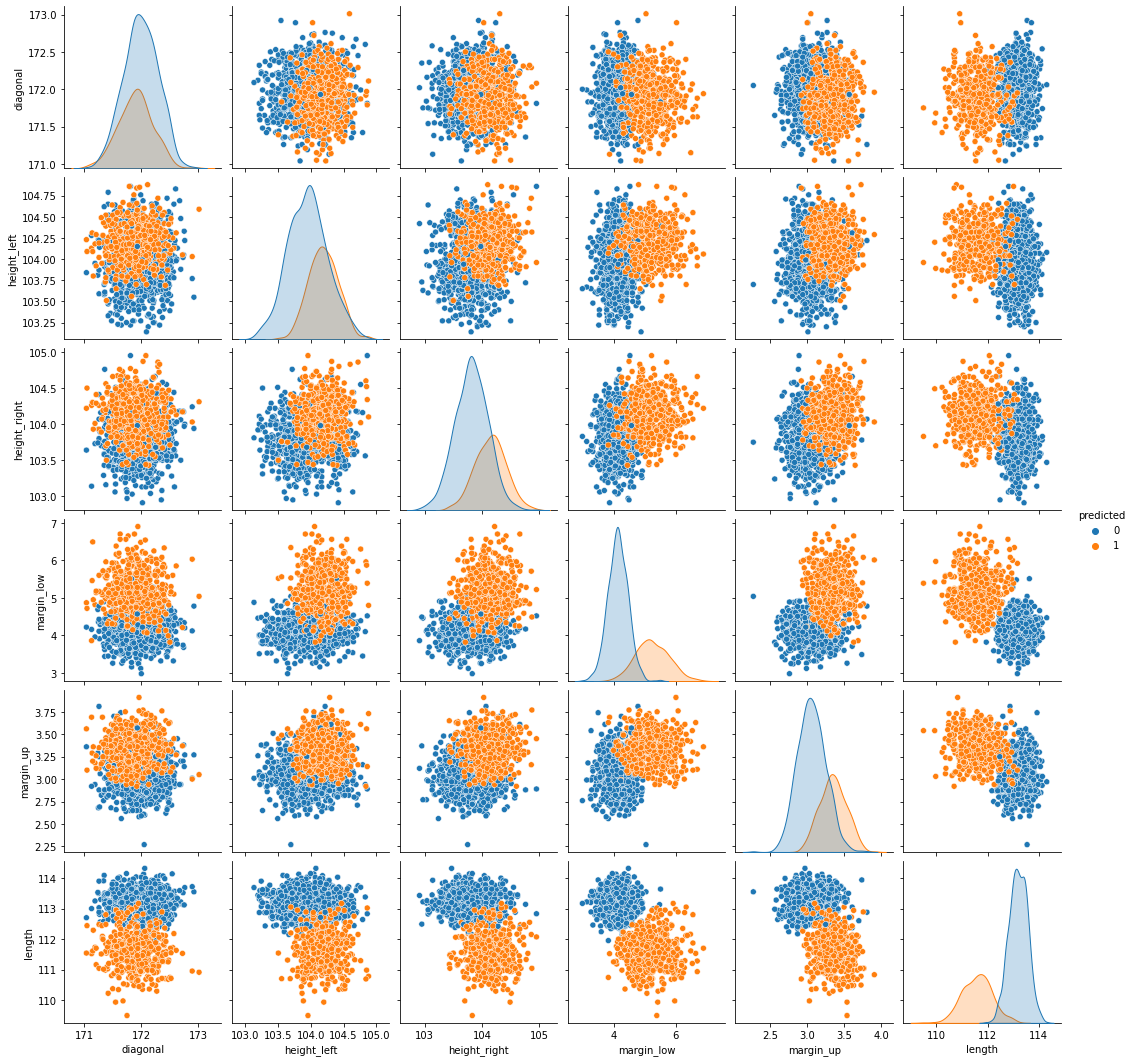

In [63]:
sns.pairplot(x_model,hue='predicted')

In [66]:
#model.predict()
#x = Billets_df[['diagonal', 'height_left', 'height_right','margin_low','margin_up','length']]
Billets_production_df[['diagonal', 'height_left', 'height_right','margin_low','margin_up','length']]

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.76,104.01,103.54,5.21,3.30,111.42
1,171.87,104.17,104.13,6.00,3.31,112.09
2,172.00,104.58,104.29,4.99,3.39,111.57
3,172.49,104.55,104.34,4.44,3.03,113.20
4,171.65,103.63,103.56,3.77,3.16,113.33


In [67]:
retour_prediction = model.predict(Billets_production_df[['diagonal', 'height_left', 'height_right','margin_low','margin_up','length']])

In [68]:
retour_prediction

array([1, 1, 1, 0, 0])

In [72]:
centroids  = model.cluster_centers_
centroids

array([[171.9882085 , 103.95442308, 103.81415992,   4.12281377,
          3.05876518, 113.19573887],
       [171.89884211, 104.19130526, 104.14469474,   5.24132632,
          3.34926316, 111.59111579]])